C:\Users\HASINI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Final Centroids (Cluster Centers):
[[ 5.83333333  5.33333333]
 [25.         25.        ]]

Cluster Assignments:
Point A: Cluster 1
Point B: Cluster 1
Point C: Cluster 1
Point D: Cluster 1
Point E: Cluster 1
Point F: Cluster 1
Point G: Cluster 2


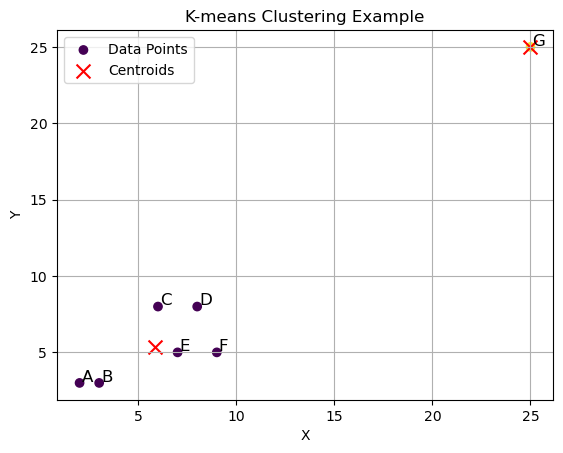

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
 
# Define the data points (A, B, C, D, E, F)
data = np.array([
    [2, 3],  # Point A
    [3, 3],  # Point B
    [6, 8],  # Point C
    [8, 8],  # Point D
    [7, 5],  # Point E
    [9, 5],  # Point F
    [25,25]
])
 
# Perform K-means clustering with K=2
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)
 
# Get the cluster centers (centroids) and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
 
# Print the final centroids and cluster assignments
print("Final Centroids (Cluster Centers):")
print(centroids)
 
print("\nCluster Assignments:")
for i, label in enumerate(labels):
    print(f"Point {chr(65+i)}: Cluster {label+1}")
 
# Plot the data points and the centroids
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
 
# Annotate points
for i, point in enumerate(data):
    plt.text(point[0]+0.1, point[1]+0.1, f'{chr(65+i)}', fontsize=12)
 
plt.title('K-means Clustering Example')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
import pandas as pd
df = pd.read_csv('kmeans_dataset_with_outliers.csv')
df

,X,Y,Label
0,1.248357,1.760413,Cluster 1
1,0.930868,1.907171,Cluster 1
2,1.323844,1.446833,Cluster 1
3,1.761515,1.401897,Cluster 1
4,0.882923,2.406263,Cluster 1
...,...,...,...
195,-22.261882,-31.187884,Outlier
196,-3.630160,-14.664777,Outlier
197,8.365611,-42.226536,Outlier
198,47.439481,48.621074,Outlier


          X         Y      Label
0  1.248357  1.760413  Cluster 1
1  0.930868  1.907171  Cluster 1
2  1.323844  1.446833  Cluster 1
3  1.761515  1.401897  Cluster 1
4  0.882923  2.406263  Cluster 1


C:\Users\HASINI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Final Centroids (Cluster Centers):
[[  4.00531893   4.36387374]
 [-30.56466691  37.32771148]]


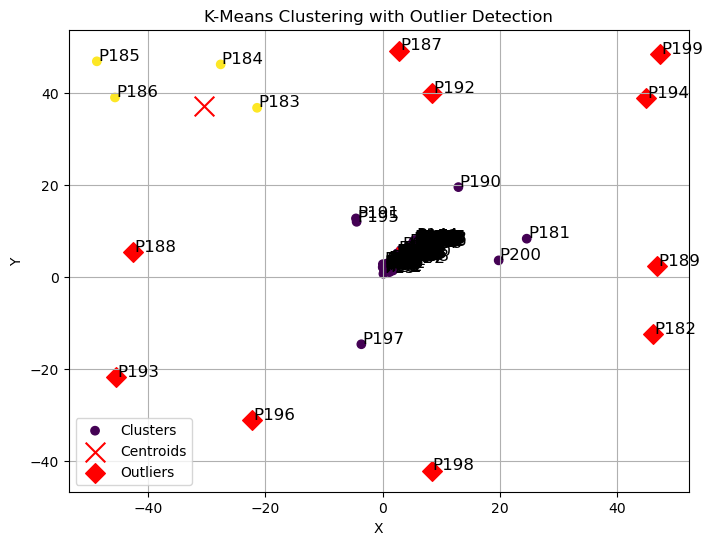

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load dataset from CSV
df = pd.read_csv('kmeans_dataset_with_outliers.csv')

# Check the first few rows to verify data structure
print(df.head())

# Extract X and Y coordinates for clustering
data = df[['X', 'Y']].values

# Perform K-Means clustering with K=2
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
labels = kmeans.fit_predict(data)
centroids = kmeans.cluster_centers_

# Add cluster labels to the dataset
df['Cluster'] = labels

# Identify potential outliers (points far from centroids)
distances = np.min(kmeans.transform(data), axis=1)
outlier_threshold = np.percentile(distances, 95)  # Top 5% as outliers
df['Outlier'] = distances > outlier_threshold

# Print Final Centroids
print("\nFinal Centroids (Cluster Centers):")
print(centroids)

# Print Cluster Assignments with Outlier Detection
# print("\nCluster Assignments:")
for i, (x, y, cluster, is_outlier) in enumerate(df[['X', 'Y', 'Cluster', 'Outlier']].values):
    status = "Outlier" if is_outlier else f"Cluster {cluster+1}"
    # print(f"Point {i+1} ({x}, {y}): {status}")

# Plot Clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['X'], df['Y'], c=df['Cluster'], cmap='viridis', marker='o', label='Clusters')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')

# Highlight Outliers
outliers = df[df['Outlier']]
plt.scatter(outliers['X'], outliers['Y'], c='red', marker='D', s=100, label='Outliers')

# Annotate Points
for i, row in df.iterrows():
    plt.text(row['X'] + 0.2, row['Y'] + 0.2, f'P{i+1}', fontsize=12)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means Clustering with Outlier Detection')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\HASINI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HASINI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Final Centroids (After Removing Outliers):
[[  3.4533545    4.43198661]
 [-35.88444221  42.3210902 ]]


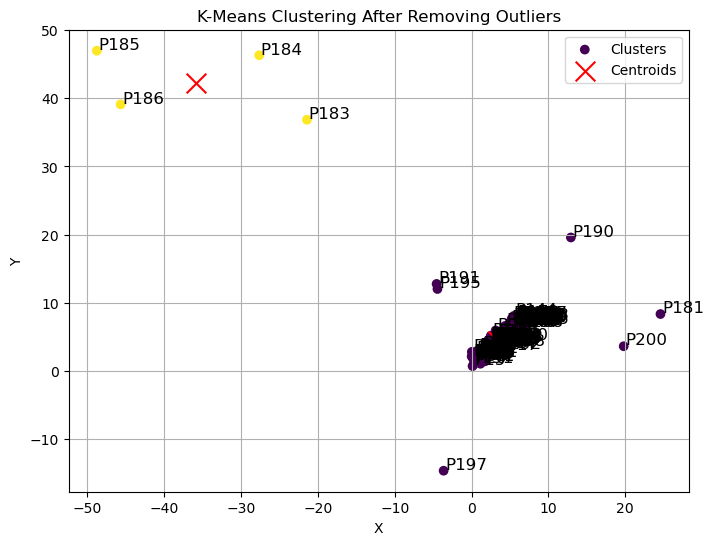

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load dataset from CSV
df = pd.read_csv('kmeans_dataset_with_outliers.csv')

# Extract X and Y coordinates for clustering
data = df[['X', 'Y']].values

# Perform initial K-Means clustering to detect outliers
kmeans_initial = KMeans(n_clusters=2, random_state=0, n_init=10)
labels_initial = kmeans_initial.fit_predict(data)
centroids_initial = kmeans_initial.cluster_centers_

# Compute distance of each point from nearest centroid
distances = np.min(kmeans_initial.transform(data), axis=1)

# Define outlier threshold (Top 5% farthest points)
outlier_threshold = np.percentile(distances, 95)
df['Outlier'] = distances > outlier_threshold

# Drop outliers from the dataset
df_cleaned = df[~df['Outlier']].copy()

# Perform K-Means again on the cleaned dataset (without outliers)
data_cleaned = df_cleaned[['X', 'Y']].values
kmeans_final = KMeans(n_clusters=2, random_state=0, n_init=10)
df_cleaned['Cluster'] = kmeans_final.fit_predict(data_cleaned)
centroids_final = kmeans_final.cluster_centers_

# Print final centroids
print("\nFinal Centroids (After Removing Outliers):")
print(centroids_final)

# Print Cluster Assignments
# # print("\nCluster Assignments (Without Outliers):")
# for i, (x, y, cluster) in enumerate(df_cleaned[['X', 'Y', 'Cluster']].values):
#     print(f"Point {i+1} ({x}, {y}): Cluster {cluster+1}")

# Plot the cleaned dataset clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned['X'], df_cleaned['Y'], c=df_cleaned['Cluster'], cmap='viridis', marker='o', label='Clusters')
plt.scatter(centroids_final[:, 0], centroids_final[:, 1], c='red', marker='x', s=200, label='Centroids')

# Annotate Points
for i, row in df_cleaned.iterrows():
    plt.text(row['X'] + 0.2, row['Y'] + 0.2, f'P{i+1}', fontsize=12)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means Clustering After Removing Outliers')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\HASINI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HASINI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HASINI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HASINI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

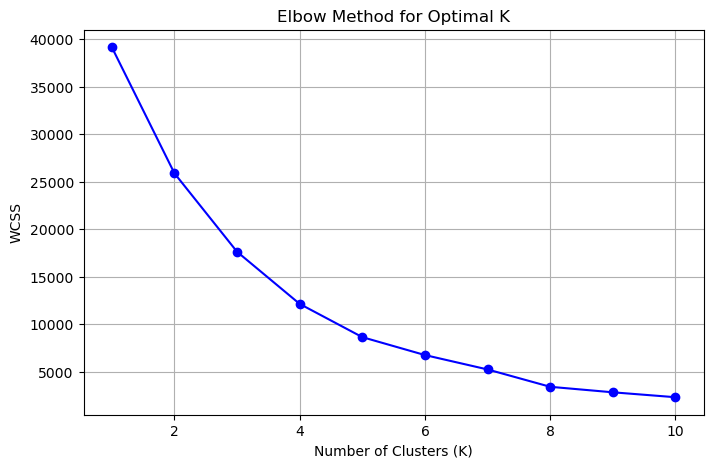

Enter the optimal number of clusters (from the elbow graph):  9


C:\Users\HASINI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HASINI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Final Centroids (After Removing Outliers):
[[  3.04595713   4.02840714]
 [  5.60077105  44.70614033]
 [ 46.24031459  43.82372642]
 [-36.66221248  42.71828266]
 [  8.36561119 -42.2265363 ]
 [ 46.5737542   -5.10157882]
 [-42.62034353   5.38542844]
 [  5.99093339   7.01883186]
 [  0.92267266   1.99815829]]


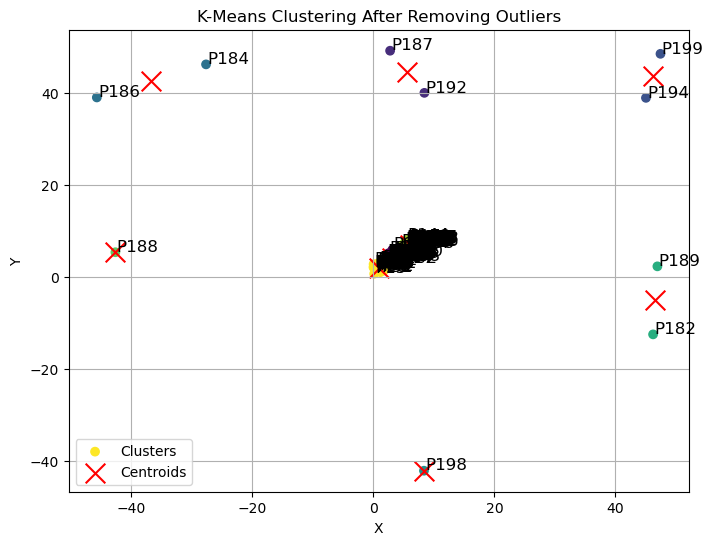

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load dataset from CSV
df = pd.read_csv('kmeans_dataset_with_outliers.csv')

# Extract X and Y coordinates for clustering
data = df[['X', 'Y']].values

# Step 1: Determine Optimal Number of Clusters using Elbow Method
wcss = []
K_range = range(1, 11)  # Testing for K = 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

# Plot the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

# Step 2: Choose the Optimal K Based on the Elbow Point
optimal_k = int(input("Enter the optimal number of clusters (from the elbow graph): "))

# Perform initial K-Means clustering to detect outliers
kmeans_initial = KMeans(n_clusters=optimal_k, random_state=0, n_init=10)
labels_initial = kmeans_initial.fit_predict(data)
centroids_initial = kmeans_initial.cluster_centers_

# Compute distance of each point from nearest centroid
distances = np.min(kmeans_initial.transform(data), axis=1)

# Define outlier threshold (Top 5% farthest points)
outlier_threshold = np.percentile(distances, 95)
df['Outlier'] = distances > outlier_threshold

# Drop outliers from the dataset
df_cleaned = df[~df['Outlier']].copy()

# Perform K-Means again on the cleaned dataset (without outliers)
data_cleaned = df_cleaned[['X', 'Y']].values
kmeans_final = KMeans(n_clusters=optimal_k, random_state=0, n_init=10)
df_cleaned['Cluster'] = kmeans_final.fit_predict(data_cleaned)
centroids_final = kmeans_final.cluster_centers_

# Print final centroids
print("\nFinal Centroids (After Removing Outliers):")
print(centroids_final)

# Plot the cleaned dataset clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned['X'], df_cleaned['Y'], c=df_cleaned['Cluster'], cmap='viridis', marker='o', label='Clusters')
plt.scatter(centroids_final[:, 0], centroids_final[:, 1], c='red', marker='x', s=200, label='Centroids')

# Annotate Points
for i, row in df_cleaned.iterrows():
    plt.text(row['X'] + 0.2, row['Y'] + 0.2, f'P{i+1}', fontsize=12)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means Clustering After Removing Outliers')
plt.legend()
plt.grid(True)
plt.show()


In [31]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
x = np.array([[1,2],[1,4],[1,0],[4,2],[4,4],[4,0]])
clustering = AgglomerativeClustering(n_clusters=2).fit(x)
print(clustering.labels_)

[1 1 1 0 0 0]


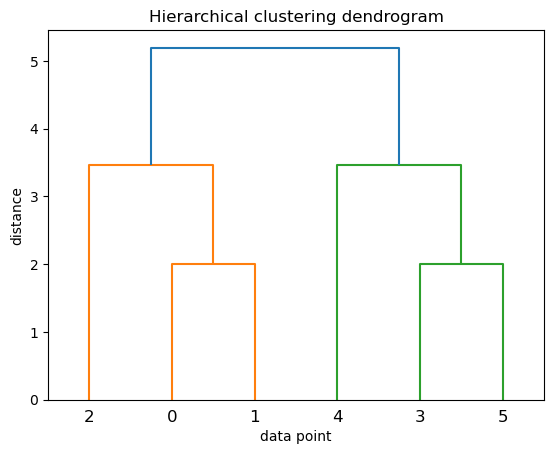

In [35]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram,linkage
import matplotlib.pyplot as plt
x = np.array([[1,2],[1,4],[1,0],[4,2],[4,4],[4,0]])
z = linkage(x,'ward')
dendrogram(z)
plt.title('Hierarchical clustering dendrogram')
plt.xlabel('data point')
plt.ylabel('distance')
plt.show()